## PyTorch module:

torchvision:

	Contains datasets, model architectures and image transformations often used for computer vision problems.

torchvision.datasets:

	Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of base classes for making custom datasets.

torchvision.models:

	This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.

torchvision.transforms:

	Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.

torch.utils.data.Dataset:

	Base dataset class for PyTorch.

torch.utils.data.DataLoader:

	Creates a Python iterable over a dataset (created with torch.utils.data.Dataset).

In [51]:
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# check version
print("PyTorch version:",torch.__version__)
print("Torchvision Version:",torchvision.__version__)

PyTorch version: 2.9.0+cu126
Torchvision Version: 0.24.0+cu126


Explanation:

torchvision → a companion library to PyTorch, specialized for computer vision.

datasets → provides ready-to-use datasets (MNIST, CIFAR10, FashionMNIST, ImageNet, etc.).

transforms → preprocessing utilities (resize, crop, normalize, convert to tensor).

ToTensor() → converts images (which are usually PIL images or NumPy arrays) into PyTorch tensors so the model can process them.

👉 Why? Because you need datasets and preprocessing tools to feed images into your model.

## 1. Getting a datasets

In [52]:
# setup training data
train_data= datasets.FashionMNIST(
    root= "data",# where to download data to ?
    train= True, # get training data
    download= True, #download data if it does not exist on disk
    transform= ToTensor() , # images come as PIL format, we want turn into Torch tensor
    target_transform= None # you can transform labels as well
)

# setup testing data
test_data= datasets.FashionMNIST(
    root= "data",
    train= False, # get test data
    download= True,
    transform= ToTensor()
)


## Explanation:
When training a computer vision model in PyTorch:

You need data (images + labels).

PyTorch provides ready-made datasets (like FashionMNIST, CIFAR10, etc.) via torchvision.datasets.

You must load these datasets into memory in a format your model understands (tensors).

You usually split data into training (to learn patterns) and testing (to evaluate performance).

In [53]:
# see first training sample
image, label= train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

Explanation:
What this code does
train_data is a torchvision.datasets.FashionMNIST object.

It behaves like a Python list: you can index into it with [0] to get the first sample.

Each sample is a tuple: (image, label).

So:

image → the actual image data (a PyTorch tensor).

label → the class index (an integer from 0–9, representing clothing categories).

In [54]:
image.shape

torch.Size([1, 28, 28])


The shape of the image tensor is [1, 28, 28] or more specifically:

[color_channels=1, height=28, width=28]
Having color_channels=1 means the image is grayscale.

If color_channels=3, the image comes in pixel values for red, green and blue (this is also known as the RGB color model).

The order of our current tensor is often referred to as CHW (Color Channels, Height, Width).

There's debate on whether images should be represented as CHW (color channels first) or HWC (color channels last)

Note: You'll also see NCHW and NHWC formats where N stands for number of images. For example if you have a batch_size=32, your tensor shape may be [32, 1, 28, 28]. We'll cover batch sizes later.

In [55]:
# how many samples are there
len(train_data.data),len(train_data.targets)

(60000, 60000)

In [56]:
len(test_data.data), len(test_data.targets)

(10000, 10000)

In [57]:
# see classes
class_names= train_data.classes
class_names

# It looks like we're dealing with 10 different kinds of clothes.

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Observation: It is a multiclass problem

# 1.2 Visualizing out data

Image shape: torch.Size([1, 28, 28])


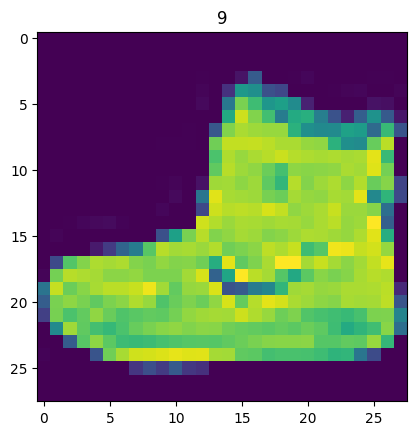

In [58]:
import matplotlib.pyplot as plt
image, label= train_data[0]
print(f"Image shape: {image.shape}" )
plt.imshow(image.squeeze()) # # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

Explanation:

🎯 Why only remove 1?
Because a dimension of size 1 is redundant — it doesn’t carry extra information.
Dimensions like 28 are meaningful (they represent the actual pixel grid), so they stay.

Think of the tensor like a box with one unnecessary wrapper layer:

[1, 28, 28] → “a single-channel image wrapped in an extra dimension.”

squeeze() → unwraps that redundant layer, leaving just [28, 28].

Text(0.5, 1.0, 'Ankle boot')

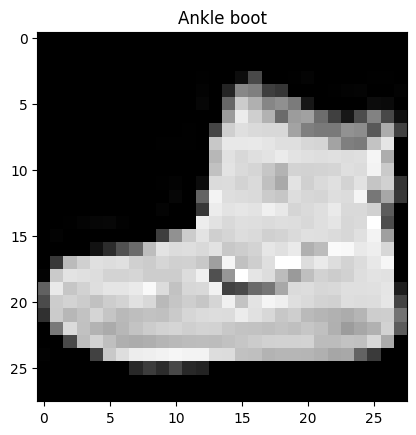

In [59]:
# We can turn the image into grayscale using the cmap parameter of plt.imshow()
plt.imshow(image.squeeze(),cmap= "gray")
plt.title(class_names[label])

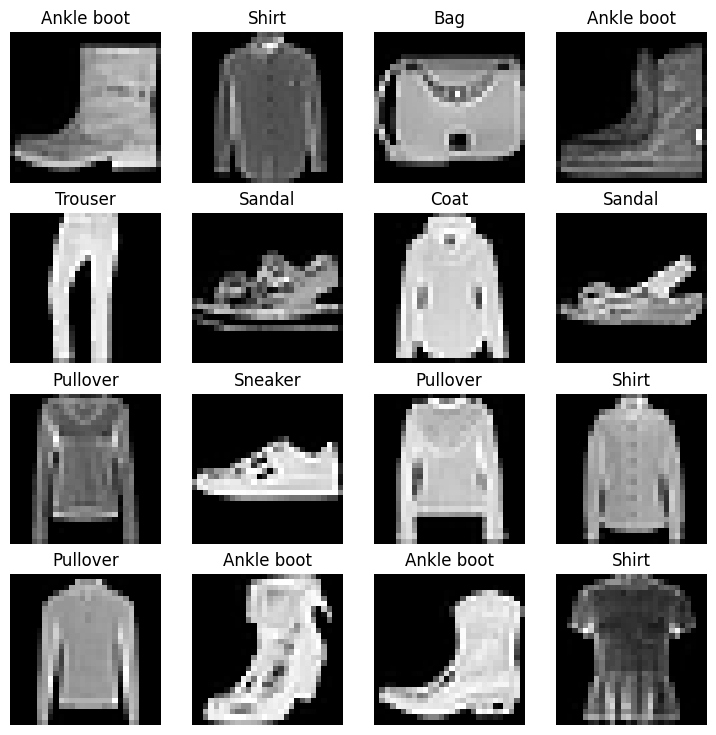

In [60]:
# plot more images
torch.manual_seed(42)
fig= plt.figure(figsize=(9,9))
rows, cols= 4, 4
for i in range(1, rows*cols+1):
  random_idx= torch.randint(0,len(train_data),size=[1]).item()
  img, label= train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)


Explanation:
torch.randint(0, len(train_data), size=[1]) → creates a tensor with one random integer, e.g. tensor([12345]).

.item() → converts that tensor into a plain Python integer 12345.

👉 This is necessary because:

Python indexing (train_data[random_idx]) expects a normal integer, not a tensor.

.item() makes the random index usable for dataset indexing.

## 2. Prepare DataLoader

In [61]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

# turn datasets into iterables(batches)
train_dataloader= DataLoader(train_data, # dataset to turn into iterable
                             batch_size= BATCH_SIZE, # how many samples per batch?
                             shuffle= True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
                       batch_size= BATCH_SIZE,
                             shuffle = False  # don't necessarily have to shuffle the testing data
                             )
# let's check what we have created
print(f"Dataloader: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")



Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x786e562cbfe0>, <torch.utils.data.dataloader.DataLoader object at 0x786e56366630>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


What is a DataLoader?
A DataLoader in PyTorch wraps your dataset (train_data, test_data) and turns it into an iterator that yields batches of data.

Instead of feeding the model one image at a time, you feed it mini-batches (e.g., 32 images at once).

This makes training faster and more stable.

Analogy
Imagine you’re teaching a class of 60,000 students (images):

Without DataLoader → you teach one student at a time (very slow).

With DataLoader → you teach 32 students at once (mini-batch), reshuffle them each round, and repeat until all are covered.

In [62]:
# check what inside the training datla
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


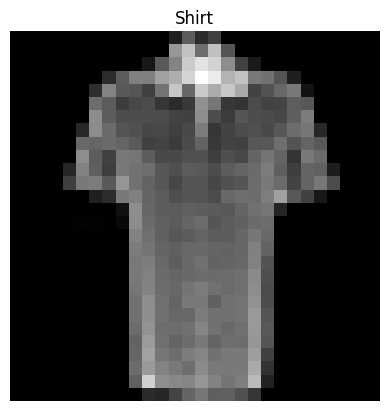

In [63]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

##3. Model 0: Build a baseline model

In [64]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


Explanation:
What does "flatten" mean?
Flattening reshapes a multi-dimensional tensor (like an image) into a 1D vector.

Example:

Before: x.shape = [1, 28, 28] → 1 channel, 28×28 pixels.

After: output.shape = [1, 784] → a single vector of 784 values (since 28×28 = 784).

🎯 Why do we flatten features?
Fully Connected Layers (Linear layers) need 1D input

Neural networks often end with nn.Linear layers (dense layers).

These layers expect input as a flat vector, not a 2D image grid.

Flattening bridges the gap between convolutional layers (which keep spatial structure) and dense layers (which classify).

Convert image pixels into features

Each pixel intensity becomes one element in the vector.

The model can then learn weights for each pixel (or combination of pixels).

Prepare for classification

After flattening, the vector is fed into layers that map features → class scores (e.g., T-shirt, sneaker, bag).

In [65]:
# Let's create our first model using nn.Flatten() as the first layer
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

Explanation:
input_shape=784 - this is how many features you've got going in the model, in our case, it's one for every pixel in the target image (28 pixels high by 28 pixels wide = 784 features).

hidden_units=10 - number of units/neurons in the hidden layer(s), this number could be whatever you want but to keep the model small we'll start with 10.

output_shape=len(class_names) - since we're working with a multi-class classification problem, we need an output neuron per class in our dataset.

In [66]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## 3.1 Setup loss, optimizer and evaluation metrics

Since we're working on a classification problem, let's bring in our helper_functions.py script and subsequently the accuracy_fn()

Note: Rather than importing and using our own accuracy function or evaluation metric(s), you could import various evaluation metrics from the TorchMetrics package.

In [67]:
import requests # Brings in the HTTP client used to fetch files from the web.
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py aready exists, skipping download")

else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



helper_functions.py aready exists, skipping download


In [68]:
# import accuracy metrics
from helper_functions import accuracy_fn

# setup loss function and optimizer
loss_fn= nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer= torch.optim.SGD(params= model_0.parameters(),lr=0.1)


## 3.2 Creating a function to time our experiments


In [69]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device:torch.device= None):
  """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """

  total_time= end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time


Explanation:

timeit.default_timer() is a high‑precision clock (more accurate than time.time()).

This function measures how long training took.

It prints the duration and the device used.

It’s important for performance tracking, debugging, and comparing CPU vs GPU speed

## 3.3 Creating a training loop and training a model on batches of data

In [70]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu= timer()

epochs=3

# create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  # training
  train_loss=0
  # add a loop to loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()

    # 1. forward pass
    y_pred= model_0(X)

    # 2. calculate loss (per batch)
    loss= loss_fn(y_pred,y)
    train_loss += loss # accumulatively add up the loss per epoch

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # print out how many samples have been seen
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # divide total train loss by length of train dataloader
  train_loss = train_loss / len(train_dataloader)

  # testing
  # setup variables for accumulatively adding up loss and accuracy
  test_loss, test_acc= 0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      # 1. forward pass
      test_pred= model_0(X)

      # 2. calculate loss(accumatelively)
      test_loss= test_loss + loss_fn(test_pred, y)

      # 3. calculate accuracy (preds need to be same as y_true )
      test_acc= test_acc + accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # calculations on test metrics need to happen inside torch.inference_mode()
    #  Divide total test loss by length of test dataloader (per batch)
    test_loss = test_loss / len(test_dataloader)

    # Divide total accuracy by length of test dataloader (per batch)
    test_acc= test_acc / len(test_dataloader)

  # print out what's happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss:{test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


# calculate training  time
train_time_end_on_cpu= timer()
total_train_time_model_0 = print_train_time(
    start= train_time_start_on_cpu,
    end= train_time_end_on_cpu,
    device= str(next(model_0.parameters()).device)
)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss:0.50954, Test acc: 82.04%

Epoch: 1
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss:0.47989, Test acc: 83.20%

Epoch: 2
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss:0.47664, Test acc: 83.43%

Train time on cpu: 26.488 seconds


tqdm.auto → the progress bar showing how far you’ve run.

Training loop → your practice laps (learning).

Testing loop → the actual race (evaluation).

Timer → stopwatch telling you how long the race took.

Switches model to evaluation mode (eval()).

Disables gradient tracking (inference_mode() → faster, less memory).

Loops through test data, calculates loss and accuracy.

## 4. Make predictions and get Model 0 results

Insights:
Accuracy upto 30 % is not considered as good.

In [71]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. setup device agnostic-code(for using a GPU if there is one)

In [72]:
import torch
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 6. Model 1: Building a better model with non-linrearity

In [73]:
#create a model with non-linear(using ReLU) and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape: int):
    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)


We'll need input_shape=784 (equal to the number of features of our flatten image data), hidden_units=10 (starting small and the same as our baseline model) and output_shape=len(class_names) (one output unit per class).

In [74]:
torch.manual_seed(42)
model_1= FashionMNISTModelV1(
    input_shape=784, # input layer have 784 number of neurons
    hidden_units= 10,
    output_shape= len(class_names)
).to(device)
next(model_1.parameters()).device


device(type='cuda', index=0)

In [75]:
# setup loss, optimizer and evaluation metrics
from helper_functions import accuracy_fn
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params= model_1.parameters(),lr=0.1)


## 6.2 Functionzing training and test loops


In [76]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device= device
               ):
  train_loss, train_acc=0,0
  model.to(device)
  for batch, (X,y) in enumerate(data_loader):
    # send data ot GPU
    X, y = X.to(device), y.to(device)

    # 1. forward pass
    y_pred= model(X)

    # 2. calculate loss
    loss= loss_fn(y_pred, y)
    train_loss = train_loss + loss
    train_acc= train_acc + accuracy_fn(y_true= y,
                                       y_pred= y_pred.argmax(dim=1)) # Go from logits -> pred labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # $. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

  # calculate loss and accuracy per epoch and print out what's happening
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"train loss: {train_loss:.5f}  | Train accuracy: {train_acc:.2f}%")\

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

    test_loss, test_acc=0,0
    model.to(device)
    model.eval()

    with torch.inference_mode():
      for X, y in data_loader:
        # send data to GPU
        X, y= X.to(device), y.to(device)

        # 1. forward pass
        test_pred= model(X)

        # 2. calculate loss and accuracy
        test_loss += loss_fn(test_pred, y)
        test_acc += accuracy_fn(y_true=y,
                                y_pred= test_pred.argmax(dim=1))

      # adjust metrics and print out
      test_loss /= len(data_loader)
      test_acc /= len(data_loader)
      print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


In [77]:
# Let's also time things to see how long our code takes to run on the GPU.

torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
train loss: 1.09199  | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
train loss: 0.78101  | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
train loss: 0.67027  | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 29.634 seconds


Lets evaluate our trained model_1 using our eval_model() function and see how it went

## We must setup our data, model and evaluation function to use device-agnostic code.

In [78]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [79]:
# chech baseline results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

Note: Base(wtihout ReLU function) model have better accuracy(30%) than model_1(having ReLU function) accuracy(10%)

## 7. Model 2: Building a Convolutional Neural Network(CNN)

The CNN model we're going to be using is known as TinyVGG from the CNN Explainer website.

It follows the typical structure of a convolutional neural network:

Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer

What is TinyVGG?
TinyVGG is a small, simplified version of the famous VGG network (Visual Geometry Group model from Oxford).

VGG is a deep CNN architecture that stacks many convolutional layers with small kernels (3×3) and uses max pooling to gradually reduce spatial dimensions.

TinyVGG is a teaching/demo model used in the CNN Explainer website (poloclub.github.io in Bing) to help learners visualize how CNNs work.

It follows the same principles as VGG but with far fewer layers, so it’s easier to understand and train on small datasets like FashionMNIST.

canonical structure of a convolutional neural network (CNN):

Input layer

Takes in the raw image (e.g., FashionMNIST 28×28 grayscale).

Shape often [batch_size, channels, height, width].

Convolutional layer

Applies filters (kernels) that slide across the image.

Learns local features like edges, corners, textures.

Activation layer (ReLU)

Introduces non‑linearity.

Ensures the network can learn complex patterns beyond linear combinations.

Pooling layer (MaxPool)

Downsamples the feature maps.

Keeps the strongest signals (e.g., max value in a 2×2 window).

Reduces computation and helps with translation invariance.

Output layer (Fully Connected + Softmax)

Flattens the learned features.

Maps them to class scores (e.g., 10 classes in FashionMNIST).

Softmax converts scores into probabilities.

## TinyVGG structure (simplified)
Typically looks like:

Input (image)
 -> Conv2d (3x3 filters)
 -> ReLU
 -> Conv2d (3x3 filters)
 -> ReLU
 -> MaxPool2d
 -> Conv2d (3x3 filters)
 -> ReLU
 -> Conv2d (3x3 filters)
 -> ReLU
 -> MaxPool2d
 -> Flatten
 -> Fully Connected (Linear)
 -> Output (Softmax for class probabilities)

 Notice the pattern: two convolutional layers + ReLU → pooling → repeat.

This is exactly the design philosophy of VGG, but “tiny” because it uses fewer layers and smaller hidden sizes.


In [80]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## Explanation:

input_shape: number of input channels (for FashionMNIST = 1, grayscale).

hidden_units: number of filters in the convolutional layers (here = 10).

output_shape: number of classes (FashionMNIST = 10).

## Block 1:
Conv2d #1: learns 10 filters (3×3) from the input image.

ReLU: adds non‑linearity.

Conv2d #2: another set of 10 filters, refining features.

ReLU again.

MaxPool2d: halves spatial dimensions (28×28 → 14×14).

👉 After Block 1, output shape = [batch_size, 10, 14, 14].

## Block 2:
Another pair of convolution + ReLU layers.

Still 10 filters, each 3×3.

MaxPool reduces spatial size again (14×14 → 7×7).

👉 After Block 2, output shape = [batch_size, 10, 7, 7].

## Classifier:
Flatten: converts [batch_size, 10, 7, 7] → [batch_size, 490].

Linear: fully connected layer mapping 490 features → 10 output classes.

Each output corresponds to one FashionMNIST class (T‑shirt, Trouser, etc.).

## Forward pass:
Input image goes through Block 1 → Block 2 → Classifier.

Final output = logits of shape [batch_size, 10].

These logits are fed into CrossEntropyLoss, which applies softmax internally.

## Model Installation:
torch.manual_seed(42): ensures reproducibility (same random weights each run).

input_shape=1: grayscale images.

hidden_units=10: each conv layer learns 10 filters.

output_shape=len(class_names): 10 classes in FashionMNIST.

.to(device): moves model to CPU or GPU depending on availability.

## Summary
Block 1: Conv → ReLU → Conv → ReLU → Pool (28×28 → 14×14).

Block 2: Conv → ReLU → Conv → ReLU → Pool (14×14 → 7×7).

Classifier: Flatten → Linear (490 → 10).

Output: logits for 10 classes.

This is a TinyVGG‑style CNN, compact but powerful enough to learn FashionMNIST patterns.

## Question: What does the "2d" in nn.Conv2d() stand for?

The 2d is for 2-dimensional data. As in, our images have two dimensions: height and width. Yes, there's color channel dimension but each of the color channel dimensions have two dimensions too: height and width.

For other dimensional data (such as 1D for text or 3D for 3D objects) there's also nn.Conv1d() and nn.Conv3d().

## 7.3 Setup a loss function and optimizer for model_2

In [81]:
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params= model_2.parameters(), lr=0.1)

In [82]:
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


## 7.4 Training and testing model_2 using our training and test functions

In [83]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2= timer()

# train and test model
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n.....")
  train_step(data_loader= train_dataloader,
            model= model_2,
             loss_fn= loss_fn,
             optimizer= optimizer,
             accuracy_fn= accuracy_fn,
             device= device)

  test_step(data_loader= test_dataloader,
            model= model_2,
            loss_fn= loss_fn,
            accuracy_fn= accuracy_fn,
            device= device)

train_time_end_model_2= timer()
total_train_time_model_2= print_train_time(
    start= train_time_start_model_2,
    end= train_time_end_model_2,
    device= device
)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
.....
train loss: 0.59529  | Train accuracy: 78.46%
Test loss: 0.38787 | Test accuracy: 86.01%

Epoch: 1
.....
train loss: 0.35669  | Train accuracy: 87.16%
Test loss: 0.35648 | Test accuracy: 87.00%

Epoch: 2
.....
train loss: 0.32133  | Train accuracy: 88.36%
Test loss: 0.32186 | Test accuracy: 88.50%

Train time on cuda: 35.431 seconds


## Explanation:

Training loop setup:

You train for 3 epochs (passes through the entire dataset).

range(epochs) → [0, 1, 2].

tqdm(range(epochs)) → wraps the loop with a progress bar.

tqdm is a Python library that shows a live progress bar in the terminal or notebook.

It updates automatically each iteration, so you can see how far along training is.

Training:

Runs one training epoch:

Loops through train_dataloader (mini‑batches of training images).

Moves data to device (CPU/GPU).

Feeds data through model_2.

Computes loss with loss_fn (CrossEntropyLoss).

Backpropagates gradients.

Updates weights with optimizer.

Tracks accuracy with accuracy_fn.

Testing:

Evaluates the model on the test dataset (no weight updates).

Measures how well the model generalizes to unseen data.

Reports test loss and accuracy.

In [84]:
# evaluate model_2's resutls with our eval_model() function
model_2_results= eval_model(
    model= model_2,
    data_loader= test_dataloader,
    loss_fn= loss_fn,
    accuracy_fn= accuracy_fn
)

model_2_results



{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3218592405319214,
 'model_acc': 88.49840255591054}

## 8. compare model results and training time

In [85]:
import pandas as pd
compare_results= pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results


,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.321859,88.498403


In [86]:
# Now add training time
compare_results["training_time"]=[
    total_train_time_model_0,
    total_train_time_model_1,
    total_train_time_model_2
]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,26.487775
1,FashionMNISTModelV1,0.685001,75.019968,29.633969
2,FashionMNISTModelV2,0.321859,88.498403,35.431158


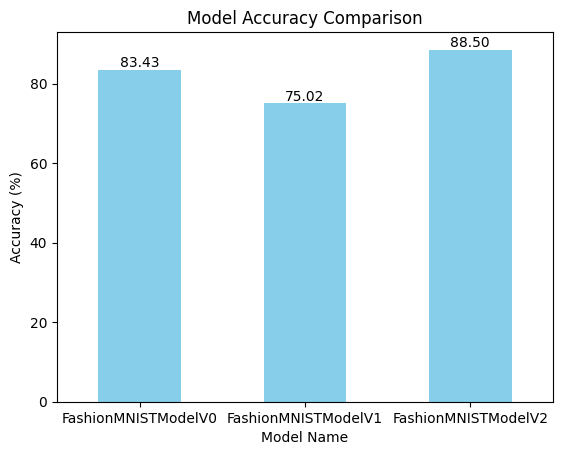

In [87]:
import matplotlib.pyplot as plt

# Plot bar chart
ax = compare_results.set_index("model_name")["model_acc"].plot(kind="bar", color="skyblue")

# Fix axis labels
plt.xlabel("Model Name")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=0)

# Add exact accuracy values on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",   # format to 2 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()
